<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/CodeDemos/KNN_wine_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# get the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
# make a filder DSPS2023

In [ ]:
# get into that folder

/content/drive/MyDrive/DSPS2023


https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names

In [ ]:
#get the files with wget

--2023-10-30 15:57:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wine.data’

wine.data               [ <=>                ]  10.53K  --.-KB/s    in 0.001s  

2023-10-30 15:57:21 (8.46 MB/s) - ‘wine.data’ saved [10782]



In [ ]:
#get the files with wget

--2023-10-30 15:57:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wine.names’

wine.names              [ <=>                ]   2.96K  --.-KB/s    in 0s      

2023-10-30 15:57:21 (142 MB/s) - ‘wine.names’ saved [3036]



# Metadata

In [ ]:
open("wine.names", "r").readlines()

['1. Title of Database: Wine recognition data\n',
 '\tUpdated Sept 21, 1998 by C.Blake : Added attribute information\n',
 '\n',
 '2. Sources:\n',
 '   (a) Forina, M. et al, PARVUS - An Extendible Package for Data\n',
 '       Exploration, Classification and Correlation. Institute of Pharmaceutical\n',
 '       and Food Analysis and Technologies, Via Brigata Salerno, \n',
 '       16147 Genoa, Italy.\n',
 '\n',
 '   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au\n',
 '   (c) July 1991\n',
 '3. Past Usage:\n',
 '\n',
 '   (1)\n',
 '   S. Aeberhard, D. Coomans and O. de Vel,\n',
 '   Comparison of Classifiers in High Dimensional Settings,\n',
 '   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of\n',
 '   Mathematics and Statistics, James Cook University of North Queensland.\n',
 '   (Also submitted to Technometrics).\n',
 '\n',
 '   The data was used with many others for comparing various \n',
 '   classifiers. The classes are separable, though only RDA \n',
 

## Challenge: extract the column names from this file programmatically


# ingest the data

In [ ]:
import pandas as pd

In [ ]:
wines = ...
wines

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


{0:"quality",
           1:"Alcohol",2:"Malic acid",3:"Ash",4:"Alcalinity of ash",5:"Magnesium",
	        6:"Total phenols",7:"Flavanoids",8:"Nonflavanoid phenols",9:"Proanthocyanins",
          10:"Color intensity",11:"Hue",12:"OD280/OD315 of diluted wines",13:"Proline"}


In [ ]:
columns = {0:"quality",
           1:"Alcohol",2:"Malic acid",3:"Ash",4:"Alcalinity of ash",5:"Magnesium",
	        6:"Total phenols",7:"Flavanoids",8:"Nonflavanoid phenols",9:"Proanthocyanins",
          10:"Color intensity",11:"Hue",12:"OD280/OD315 of diluted wines",13:"Proline"}

wines.rename(columns=columns, inplace=True)
wines

In [ ]:
wines.describe()

look at the means: they are all different, look at the spreads: max - min

In [ ]:
print("{:30s} {}".format("label", "mean"))
for c in wines.columns:
  print("{:30s} {:0.2}".format(...)

label                          mean
quality                        1.9
Alcohol                        1.3e+01
Malic acid                     2.3
Ash                            2.4
Alcalinity of ash              1.9e+01
Magnesium                      1e+02
Total phenols                  2.3
Flavanoids                     2.0
Nonflavanoid phenols           0.36
Proanthocyanins                1.6
Color intensity                5.1
Hue                            0.96
OD280/OD315 of diluted wines   2.6
Proline                        7.5e+02


In [ ]:
print("{:30s} {}".format("label", "range"))
for c in wines.columns:
  print("{:30s} {:0.2}".format(...)

label                          range
quality                        2.0
Alcohol                        3.8
Malic acid                     5.1
Ash                            1.9
Alcalinity of ash              1.9e+01
Magnesium                      9.2e+01
Total phenols                  2.9
Flavanoids                     4.7
Nonflavanoid phenols           0.53
Proanthocyanins                3.2
Color intensity                1.2e+01
Hue                            1.2
OD280/OD315 of diluted wines   2.7
Proline                        1.4e+03


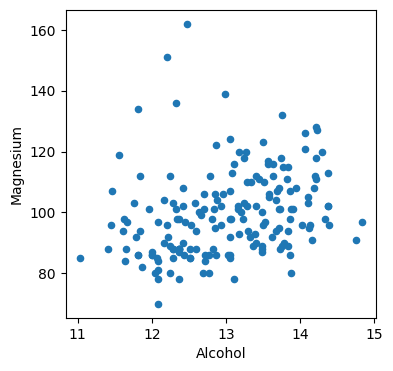

In [ ]:
import pylab as plt
wines.plot("Alcohol", "Magnesium", kind="scatter", figsize=(4,4));


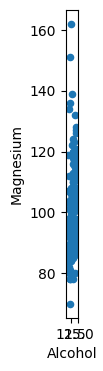

In [ ]:
import pylab as plt
ax = wines.plot("Alcohol", "Magnesium", kind="scatter", figsize=(4,4));
ax.set_aspect('equal')

what do we expect the largest distance to be??

Euclidean distance $d = \sqrt{(dx^2 + dy^2)} \sim dx$

In [ ]:
import scipy as sp
sp.spatial.distance?
#distance.#pdist?

In [ ]:
sp.spatial.distance.pdist(wines)

In [ ]:
sp.spatial.distance.pdist(wines).shape

In [ ]:
sp.spatial.distance.squareform(sp.spatial.distance.pdist(wines[["Alcohol", "Magnesium"]])).shape

In [ ]:
sp.spatial.distance.squareform(sp.spatial.distance.pdist(wines[["Alcohol", "Magnesium"]])).shape

Text(0, 0.5, 'Number of objects')

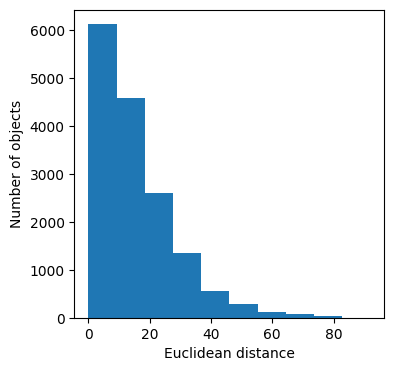

In [ ]:
plt.figure(figsize=(4,4))
plt.hist(...))
plt.xlabel("Euclidean distance")
plt.ylabel("Number of objects")

In [ ]:
plt.imshow(..., cmap="Reds")
plt.title("euclidean distance")
plt.xlabel("wine")
plt.ylabel("wine");
plt.colorbar(label="distance (euclidean)");

Text(0, 0.5, 'Number of objects')

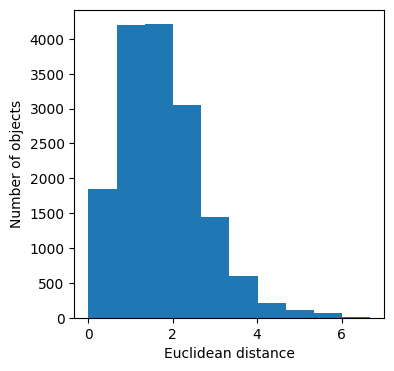

In [ ]:
#mahalanobis distance histogram
plt.figure(figsize=(4,4))
plt.hist(...)
plt.xlabel("Euclidean distance")
plt.ylabel("Number of objects")

In [ ]:
# Mahalanobis distance
plt.imshow(sp.spatial.distance.squareform(sp.spatial.distance.pdist(
    wines[["Alcohol", "Magnesium"]], "mahalanobis")), cmap="Reds")
plt.title("mahalanobis distance")
plt.xlabel("wine")
plt.ylabel("wine");
plt.colorbar(label="distance (euclidean)");

In [ ]:
# mahalanobis distance
plt.imshow(sp.spatial.distance.squareform(), cmap="Reds", clim=(0, 90))
plt.title("mahalanobis distance")
plt.xlabel("wine")
plt.ylabel("wine");
plt.colorbar(label="distance (euclidean)");

# Target

In [ ]:
wines["quality"].unique()

array([1, 2, 3])

## what is the kind of task we are doing??

# preprocessing

In [ ]:
from sklearn import preprocessing

In [ ]:
X = preprocessing.scale(...)

In [ ]:
X.mean(axis=0)

array([-8.38280756e-16, -1.19754394e-16, -8.37033314e-16, -3.99181312e-17,
       -3.99181312e-17,  0.00000000e+00, -3.99181312e-16,  3.59263181e-16,
       -1.19754394e-16,  2.49488320e-17,  1.99590656e-16,  3.19345050e-16,
       -1.59672525e-16])

In [ ]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
np.where(wines.columns == "Alcohol"), np.where(wines.columns == "Magnesium")

((array([1]),), (array([5]),))

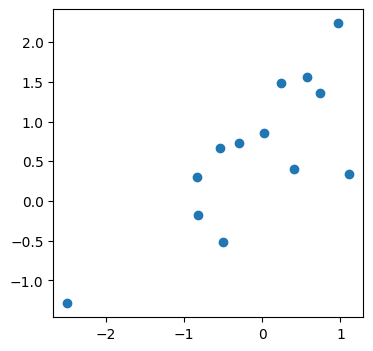

In [ ]:

ax = plt.figure(figsize=(4,4)).add_subplot()
ax.plot(X[1], X[5], 'o');
#ax.set_aspect('equal')

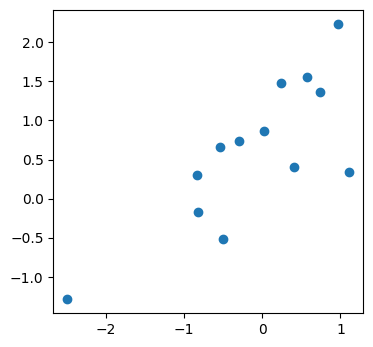

In [ ]:
ax = plt.figure(figsize=(4,4)).add_subplot()
ax.plot(X[1], X[5], 'o');
ax.set_aspect('equal')

# data exploration

In [ ]:
from sklearn.model_selection import train_test_split


# THIS WILL AID VISUALIZATION

In [ ]:
import sklearn.manifold as man #t distributed stochastic neighbourhood embedding
tsne_wines = man.TSNE(n_components=2, perplexity=30.0, early_exaggeration=90.0,
                      random_state=302).fit(X)
wine_proj = tsne_wines.fit_transform(X)
wine_proj_test = tsne_wines.fit_transform(X_test)

Text(0, 0.5, 'tsny meaningless axis 2')

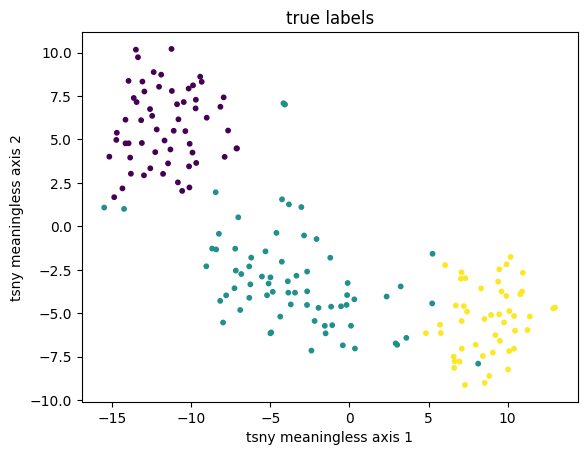

In [ ]:
import seaborn as sns
_, ax = plt.subplots()


ax.scatter(wine_proj.T[0], wine_proj.T[1], s=10, c = wines["quality"]/3);
ax.set_title("true labels")
plt.xlabel("tsny meaningless axis 1")
plt.ylabel("tsny meaningless axis 2")

# modeling

In [ ]:
import sklearn.neighbors as nb

In [ ]:
nb.KNeighborsClassifier?

In [ ]:
#model
clf = ...

KNeighborsClassifier()

In [ ]:
#score
clf....

In [ ]:
#prediction
pred = clf.predict(X_test)
pred

array([2, 3, 2, 3, 2, 3, 3, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 3, 3, 1, 1,
       2, 3, 2, 1, 2, 1, 1, 3, 3, 1, 1, 3, 3, 3, 2, 1, 1, 2, 1, 1, 2, 3,
       3])

In [ ]:
#probabilistic prediction
y_score = clf.predict_proba(X_test)
y_score

Text(0, 0.5, 'tsny meaningless axis 2')

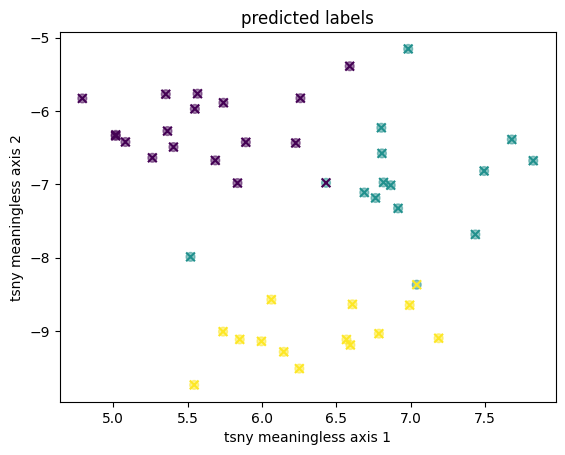

In [ ]:
#visualization of the prediction
_, ax = plt.subplots()
ax.scatter(wine_proj_test.T[0], wine_proj_test.T[1], s=40, c = y_test/3,
           alpha=0.5);
ax.set_title("true labels")

#_, ax = plt.subplots(1)

ax.scatter(wine_proj_test.T[0], wine_proj_test.T[1], marker='x', s=40, c = pred/3);
ax.set_title("predicted labels");
plt.xlabel("tsny meaningless axis 1")
plt.ylabel("tsny meaningless axis 2")

In [ ]:
#redo with jaccard distance
clf

KNeighborsClassifier(metric='jaccard')

In [ ]:
clf...

In [ ]:
#redo with cityblock distance
clf = nb.KNeighborsClassifier(n_neighbors=5, metric="cityblock")
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='cityblock')

In [ ]:
clf...

(0.9699248120300752, 0.9777777777777777)

In [ ]:
pred = clf.predict(X_test)
_, ax = plt.subplots()
ax.scatter(wine_proj_test.T[0], wine_proj_test.T[1], s=40, c = y_test/3,
           alpha=0.5);
ax.set_title("true labels")

#_, ax = plt.subplots(1)

ax.scatter(wine_proj_test.T[0], wine_proj_test.T[1], marker='x', s=40, c = pred/3);
ax.set_title("predicted labels");
plt.xlabel("tsny meaningless axis 1")
plt.ylabel("tsny meaningless axis 2")

In [ ]:
sp.spatial.distance.squareform(sp.spatial.distance.pdist(X_test)).shape

(45, 45)

In [ ]:
plt.imshow(sp.spatial.distance.squareform(sp.spatial.distance.pdist(X_test)),
           cmap="Reds")
plt.title("euclidean distance")
plt.xlabel("object")
plt.ylabel("object");
plt.colorbar(label="distance");

In [ ]:
plt.imshow(sp.spatial.distance.squareform(sp.spatial.distance.pdist(X_test, metric='jaccard')),
           cmap="Reds")
plt.title("jaccard distance")
plt.xlabel("object")
plt.ylabel("object");
plt.colorbar(label="distance");

# model evaluation

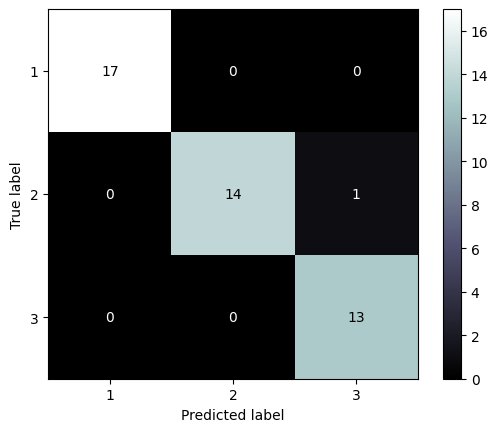

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred);
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap="bone")

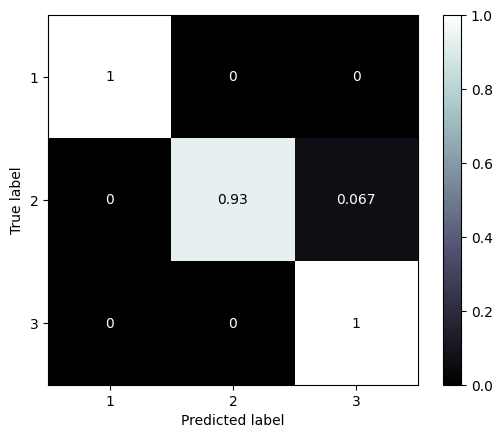

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,
                                             cmap="bone", normalize="true")

In [ ]:
from sklearn import metrics

precision, recall = metrics.precision_score(y_test, pred, average='macro'), \
                    metrics.recall_score(y_test, pred, average='macro')


print("precision {:.2f}, recall {:.2f}".format(precision, recall))